# KAN은 왜 해석 가능할까?

In [3]:
from kan import *

- width 2
    - 2D input
- width 1
    - 1D output
- width 5
    - 5 hidden neurons
- k = 3
    - cubic spline
- grid = 5
    - 5 grid intervals

In [33]:
model = KAN(width=[2,5,1], grid = 5, k = 3, seed = 0)

$f(x,y) = \exp(\sin (\pi x ) + y^2)$

In [34]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

- `n_var`는 차원이라고 생각하면 될 듯?($x,y$ 두 개)

In [35]:
dataset = create_dataset(f,n_var = 2)

In [36]:
dataset.keys()

dict_keys(['train_input', 'test_input', 'train_label', 'test_label'])

dataset이 만들어질때 grid는 shape에 영향을 주지 않음

In [37]:
dataset['train_input'].shape, dataset['test_input'].shape

(torch.Size([1000, 2]), torch.Size([1000, 2]))

step 1: sparsification하면서 train(pruning을 위한 과정)

모델 훈련하는 코드 마지막에 세미콜론 쓰면 history 안 나온다.

In [38]:
model.train(dataset, opt = "LBFGS", steps = 20, lamb = 0.01, lamb_entropy = 10.);

train loss: 1.25e-01 | test loss: 1.32e-01 | reg: 2.80e+01 : 100%|██| 20/20 [00:04<00:00,  4.35it/s]


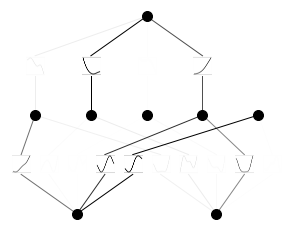

In [39]:
model.plot()

step 2: 가지치기prune(학습할때 중요한 파라메터만 남기기 위함)

In [40]:
model = model.prune()

In [41]:
model(dataset['train_input']);

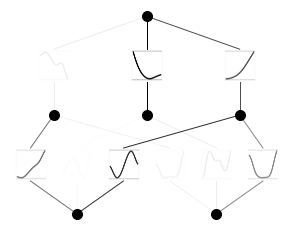

In [42]:
model.plot()

Loss Function

$\cal{l}_{total} = \cal{l}_{pred} = \lambda (\mu_1 \sum^{L-1}_{l=0} |\Psi_l|_1 + \mu_2 \sum^{L-1})_{l=1} S(\Psi_l))$

결과적으로 1output이 형성되는 것을 볼 수 있음.

model.suggest_symbolic(0,0,0)

sin이 가장 좋음

In [43]:
model.suggest_symbolic(1,0,0)

function , r2
gaussian , 0.941763162612915
tanh , 0.9183695912361145
sigmoid , 0.9179617166519165
arctan , 0.9141409397125244
abs , 0.9092889428138733


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.941763162612915)

In [44]:
model.suggest_symbolic(0,1,0)

function , r2
x^4 , 0.9780145883560181
cosh , 0.9724222421646118
x^2 , 0.8998713493347168
sin , 0.8987177014350891
gaussian , 0.8974652886390686


('x^4',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9780145883560181)

In [45]:
model.suggest_symbolic(1,0,0,topk=15)

function , r2
gaussian , 0.941763162612915
tanh , 0.9183695912361145
sigmoid , 0.9179617166519165
arctan , 0.9141409397125244
abs , 0.9092889428138733
sin , 0.8965499401092529
x^2 , 0.8392592668533325
cosh , 0.8383433818817139
x^3 , 0.8352798223495483
x^4 , 0.8342778086662292
exp , 0.8325958251953125
1/x^4 , 0.8317351341247559
1/x^3 , 0.8315536975860596
1/x^2 , 0.8312462568283081
1/x , 0.8306641578674316


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.941763162612915)

In [46]:
model.train(dataset,opt="LBFGS", steps=20);

train loss: 8.28e-03 | test loss: 8.73e-03 | reg: 8.17e+00 : 100%|██| 20/20 [00:03<00:00,  5.48it/s]


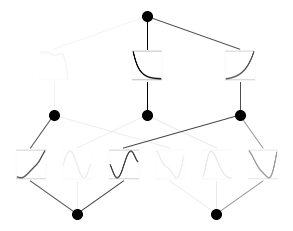

In [47]:
model.plot()

In [48]:
model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.9971072673797607
sin , 0.9970927834510803
x^2 , 0.99686199426651
cosh , 0.9968425631523132
x^3 , 0.9957089424133301


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9971072673797607)

In [49]:
model.suggest_symbolic(0,1,0)

function , r2
abs , 0.918402373790741
gaussian , 0.9081349968910217
sin , 0.9048529267311096
x^2 , 0.8696524500846863
cosh , 0.8653781414031982


('abs',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.918402373790741)

In [50]:
model.suggest_symbolic(1,0,0)

function , r2
arctan , 0.9160346388816833
gaussian , 0.9011549949645996
tanh , 0.9008036851882935
sigmoid , 0.9007985591888428
1/x^4 , 0.8955882787704468


('arctan',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9160346388816833)

In [51]:
model.auto_symbolic()

fixing (0,0,0) with gaussian, r2=0.9971072673797607
fixing (0,0,1) with sin, r2=0.9992966055870056
fixing (0,0,2) with sin, r2=0.9987211227416992
fixing (0,1,0) with abs, r2=0.918402373790741
fixing (0,1,1) with gaussian, r2=0.9743611216545105
fixing (0,1,2) with sin, r2=0.9322102665901184
fixing (1,0,0) with arctan, r2=0.9160346388816833
fixing (1,1,0) with tanh, r2=0.9999632239341736
fixing (1,2,0) with cosh, r2=0.9999960660934448


In [52]:
model.train(dataset,opt="LBFGS", steps=20);

train loss: 4.15e-03 | test loss: 4.18e-03 | reg: 1.40e+01 : 100%|██| 20/20 [00:04<00:00,  4.93it/s]


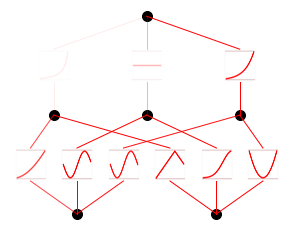

In [53]:
model.plot()

In [54]:
formula, variables = model.symbolic_formula()

In [55]:
formula[0]

0.04*cosh(-1.0*sin(3.14*x_1 + 9.42) + 8.04*sin(0.5*x_2 - 7.85) + 11.95) - 54.26*tanh(18.88*sin(3.03*x_1 - 0.11) + 47.66 + 11.28*exp(-1.42*(1 - 0.91*x_2)**2)) - 0.21*atan(11.39*Abs(9.66*x_2 - 3.42) - 63.68 + 94.66*exp(-0.05*(-0.75*x_1 - 1)**2)) + 54.58

In [56]:
formula, variables = model.symbolic_formula(var=['\\alpha','y'])

In [57]:
formula[0]

0.04*cosh(-1.0*sin(3.14*\alpha + 9.42) + 8.04*sin(0.5*y - 7.85) + 11.95) - 54.26*tanh(18.88*sin(3.03*\alpha - 0.11) + 47.66 + 11.28*exp(-1.42*(1 - 0.91*y)**2)) - 0.21*atan(11.39*Abs(9.66*y - 3.42) - 63.68 + 94.66*exp(-0.05*(-0.75*\alpha - 1)**2)) + 54.58

In [58]:
from sympy import *
diff(formula[0], variables[0])

-3104.0*(1 - tanh(18.88*sin(3.03*\alpha - 0.11) + 47.66 + 11.28*exp(-1.42*(1 - 0.91*y)**2))**2)*cos(3.03*\alpha - 0.11) - 19.88*(-0.056*\alpha - 0.075)*exp(-0.05*(-0.75*\alpha - 1)**2)/(8961.0*(0.1203*Abs(9.66*y - 3.42) - 0.6727 + exp(-0.05*(-0.75*\alpha - 1)**2))**2 + 1) - 0.125728130340576*cos(3.14*\alpha + 9.42)*sinh(-1.0*sin(3.14*\alpha + 9.42) + 8.04*sin(0.5*y - 7.85) + 11.95)

In [59]:
model.fix_symbolic(0,1,0,'cosh')

r2 is 0.9257117509841919


tensor(0.9257)

In [60]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 3.99e-03 | test loss: 4.03e-03 | reg: 1.40e+01 : 100%|██| 20/20 [00:01<00:00, 16.25it/s]


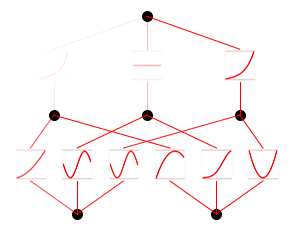

In [61]:
model.plot()